# UTS (KNN DecisionTree using dataset Breast Cancer Coimbra)

## KNN

In [26]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/HamedAyani114/dataset/main/dataR2.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [28]:
#Select the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:9].values 
Y = df.iloc[:,9].values
#OR 
#X=df.drop("Classification", axis=1)
#Y=df["Classification"]

In [29]:
## If anyone to see the data with features (X)
all_columns=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP.1']

X = pd.DataFrame(X,columns=all_columns[0:9])
all_columns[0:9]
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48.0,23.500000,70.0,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83.0,20.690495,92.0,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82.0,23.124670,91.0,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68.0,21.367521,77.0,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86.0,21.111111,92.0,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [30]:
Y[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [31]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-0.90580006, -0.60223851,  0.39996142,  5.41266386,  3.97788424,
        -0.48294549,  1.01615946, -0.73302693, -0.83359765],
       [-1.1590937 , -0.01445999,  0.26128133, -0.79254154, -0.59226514,
        -0.67908362, -0.50242597,  0.88574816, -0.67899565],
       [-0.84247665, -0.17399633, -0.24721234, -0.69308636, -0.54932947,
         1.38357642,  0.36413531, -0.29126418, -0.75855465],
       [ 0.9939022 ,  0.19135671, -0.43211912, -0.72830546, -0.58107469,
         0.17960335, -0.36087967,  0.28699465,  0.21358775],
       [ 0.93057879, -1.15834447, -0.01607885, -0.69087133, -0.53504167,
        -1.18263566,  0.08029698, -0.65683654, -1.17843428]])

In [33]:
#All the models
def models(X_train,Y_train):
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  

    
  #print model accuracy on the training data.
  print('K Nearest Neighbor Accuracy:', knn.score(X_train, Y_train))
  return knn

model = models(X_train,Y_train)

K Nearest Neighbor Accuracy: 0.8260869565217391


## Decision Tree

In [34]:

import seaborn as sns
import numba
import cv2 as cv

In [35]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [36]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
giniindex=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)
giniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [38]:
y_pred=giniindex.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[ 8,  4],
       [ 0, 12]])

In [39]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.75      1.00      0.86        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24



In [40]:
entropy_deci=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [41]:
y_pred_entropy=entropy_deci.predict(X_test)
confusion_matrix(Y_test,y_pred_entropy)

array([[ 9,  3],
       [ 0, 12]])

In [42]:
print(classification_report(Y_test,y_pred_entropy))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           2       0.80      1.00      0.89        12

    accuracy                           0.88        24
   macro avg       0.90      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



In [43]:
from sklearn import tree

[Text(0.475, 0.9166666666666666, 'X[2] <= 91.5\ngini = 0.491\nsamples = 92\nvalue = [40, 52]'),
 Text(0.2, 0.75, 'X[3] <= 3.793\ngini = 0.432\nsamples = 38\nvalue = [26, 12]'),
 Text(0.1, 0.5833333333333334, 'X[1] <= 23.124\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.05, 0.4166666666666667, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.15, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3, 0.5833333333333334, 'X[0] <= 44.5\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.35, 0.4166666666666667, 'X[7] <= 14.227\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.25, 0.25, 'X[0] <= 52.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.45, 0.25, 'X[1] <= 30.29\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),

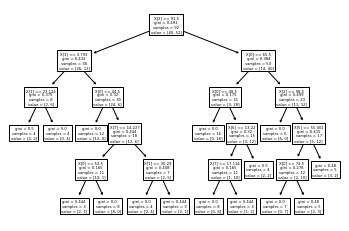

In [44]:
tree.plot_tree(giniindex)

[Text(0.5, 0.9166666666666666, 'X[2] <= 91.5\nentropy = 0.988\nsamples = 92\nvalue = [40, 52]'),
 Text(0.3076923076923077, 0.75, 'X[0] <= 44.5\nentropy = 0.9\nsamples = 38\nvalue = [26, 12]'),
 Text(0.23076923076923078, 0.5833333333333334, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.38461538461538464, 0.5833333333333334, 'X[7] <= 14.227\nentropy = 0.996\nsamples = 26\nvalue = [14, 12]'),
 Text(0.23076923076923078, 0.4166666666666667, 'X[1] <= 25.745\nentropy = 0.811\nsamples = 16\nvalue = [12, 4]'),
 Text(0.15384615384615385, 0.25, 'X[0] <= 73.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.23076923076923078, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3076923076923077, 0.25, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5384615384615384, 0.4166666666666667, 'X[1] <= 30.29\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Tex

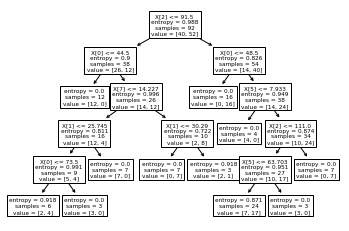

In [45]:
tree.plot_tree(entropy_deci)